In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [255]:
df = pd.read_csv("/Users/mayurimamdi/Downloads/archive-4/all_commodities_data.csv")

In [256]:
df.head()

,ticker,commodity,date,open,high,low,close,volume
0,GC=F,Gold,2000-08-30,273.899994,273.899994,273.899994,273.899994,0
1,GC=F,Gold,2000-08-31,274.799988,278.299988,274.799988,278.299988,0
2,GC=F,Gold,2000-09-01,277.000000,277.000000,277.000000,277.000000,0
3,GC=F,Gold,2000-09-05,275.799988,275.799988,275.799988,275.799988,2
4,GC=F,Gold,2000-09-06,274.200012,274.200012,274.200012,274.200012,0


In [257]:
df['commodity'].value_counts()

commodity
Copper       5979
Silver       5976
Gold         5975
Palladium    5683
Platinum     5443
Name: count, dtype: int64

In [258]:
df['date']=pd.to_datetime(df['date'])

In [259]:
df = df.sort_values('date')

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29056 entries, 11951 to 29055
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ticker     29056 non-null  object        
 1   commodity  29056 non-null  object        
 2   date       29056 non-null  datetime64[ns]
 3   open       29056 non-null  float64       
 4   high       29056 non-null  float64       
 5   low        29056 non-null  float64       
 6   close      29056 non-null  float64       
 7   volume     29056 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 2.0+ MB


In [261]:
df.head()

,ticker,commodity,date,open,high,low,close,volume
11951,PL=F,Platinum,2000-01-04,428.0,430.0,421.000000,429.700012,632
23373,PA=F,Palladium,2000-01-04,445.0,446.0,439.000000,441.899994,177
23374,PA=F,Palladium,2000-01-05,436.0,439.0,433.000000,438.100006,319
11952,PL=F,Platinum,2000-01-05,428.0,428.0,416.899994,419.899994,571
23375,PA=F,Palladium,2000-01-06,434.5,437.0,430.200012,435.299988,180


In [262]:
df['year'] = df['date'].dt.year

In [263]:
df['month'] = df['date'].dt.month

In [264]:
df['day'] = df['date'].dt.day

In [265]:
df.head()

,ticker,commodity,date,open,high,low,close,volume,year,month,day
11951,PL=F,Platinum,2000-01-04,428.0,430.0,421.000000,429.700012,632,2000,1,4
23373,PA=F,Palladium,2000-01-04,445.0,446.0,439.000000,441.899994,177,2000,1,4
23374,PA=F,Palladium,2000-01-05,436.0,439.0,433.000000,438.100006,319,2000,1,5
11952,PL=F,Platinum,2000-01-05,428.0,428.0,416.899994,419.899994,571,2000,1,5
23375,PA=F,Palladium,2000-01-06,434.5,437.0,430.200012,435.299988,180,2000,1,6


In [266]:
gold_df = df[df['commodity'] == 'Gold'][['date', 'close']]
gold_df.set_index('date', inplace=True)


In [267]:
gold_df.head()

,close
date,
2000-08-30,273.899994
2000-08-31,278.299988
2000-09-01,277.000000
2000-09-05,275.799988
2000-09-06,274.200012


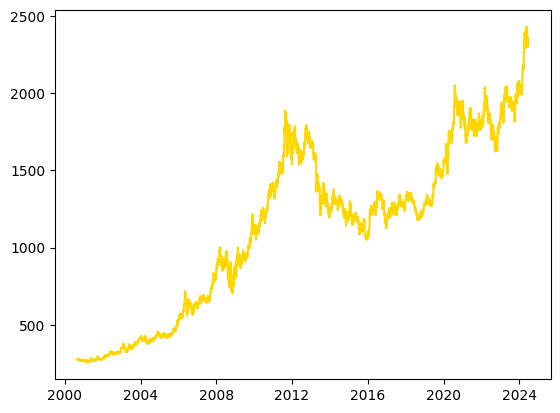

In [268]:
plt.plot(gold_df, label='Gold Close Price', color='gold')

Observation : Golds data seems like a trend 

In [269]:
df_silver=df[df['commodity']=='Silver']

<Axes: xlabel='date', ylabel='close'>

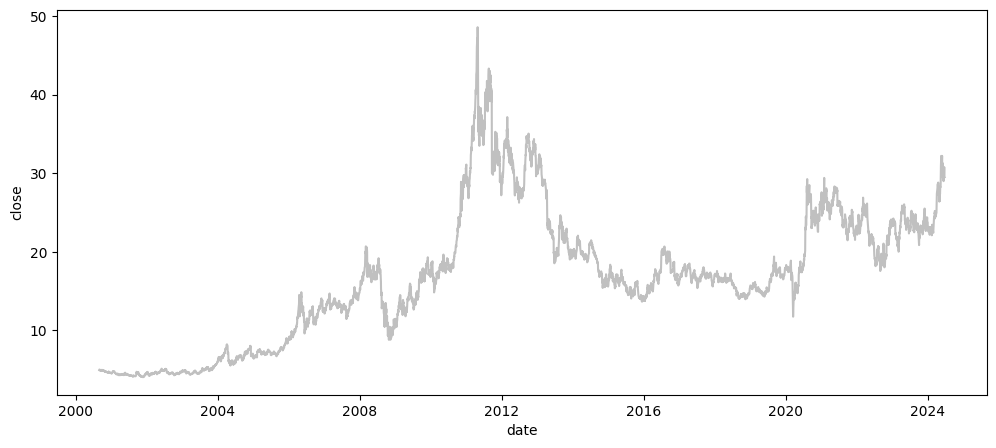

In [270]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df_silver, x='date', y='close', color='silver')

Observation : 2010-2011 year was the highest 

In [271]:
plat_df=df[df['commodity']=='Platinum']

<Axes: xlabel='date', ylabel='close'>

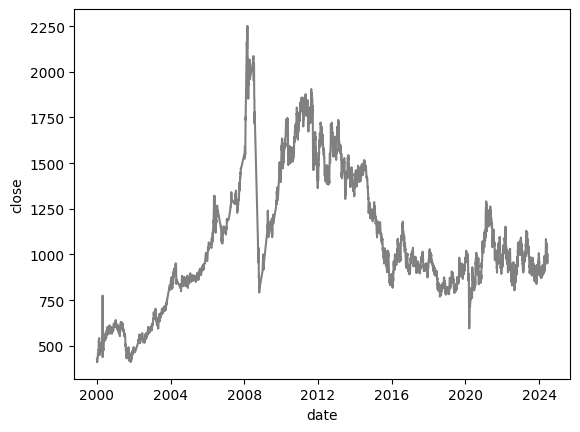

In [272]:
sns.lineplot(data=plat_df, x='date', y='close', color='gray')

Observation : 2008 year was the most volatile of all the years 

<Axes: xlabel='date', ylabel='close'>

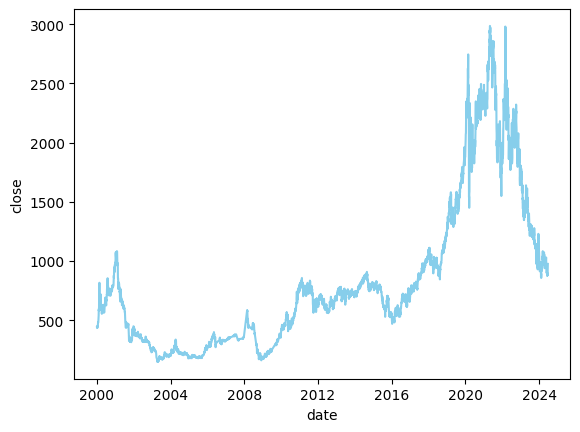

In [273]:
palla_df=df[df['commodity']=='Palladium']
sns.lineplot(data=palla_df, x='date', y='close', color='skyblue')

In [274]:
df['commodity'].unique()

array(['Platinum', 'Palladium', 'Gold', 'Silver', 'Copper'], dtype=object)

In [275]:
df_de = df[df['commodity'] == 'Gold'].copy()


In [276]:
df_de['date'] = pd.to_datetime(df_de['date'])
df_de = df_de.set_index('date').sort_index()


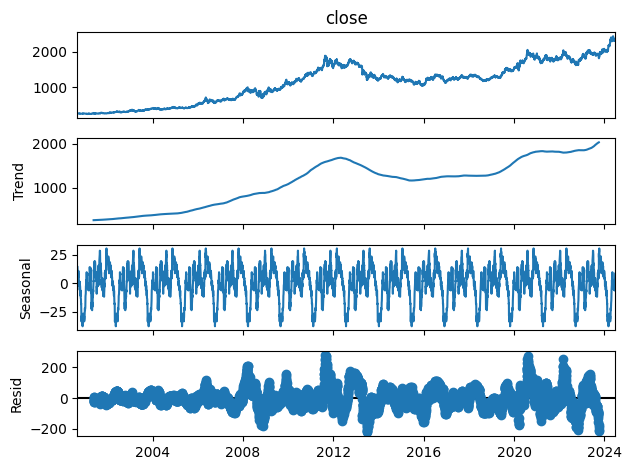

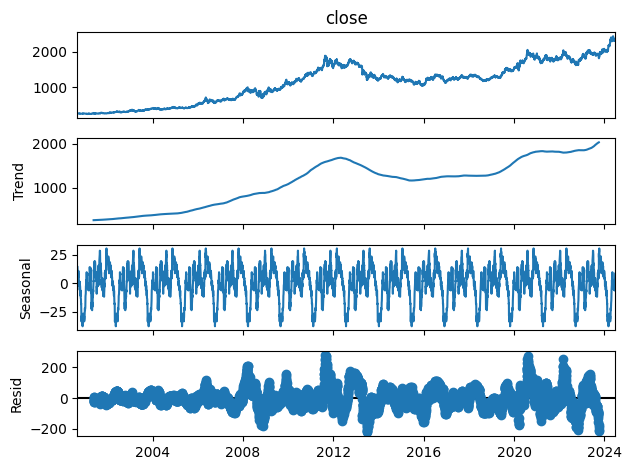

In [277]:
decomp = seasonal_decompose(df_de['close'], model='additive', period=365)
decomp.plot()


Observation :  There is also seasonality on Gold from 2000-2024

Lets do the same for silver and platinum 

In [278]:
sil_df=df[df['commodity']=='Silver'].copy()


In [279]:
sil_df['date']= pd.to_datetime(sil_df['date'])
sil_df= sil_df.set_index('date').sort_index()

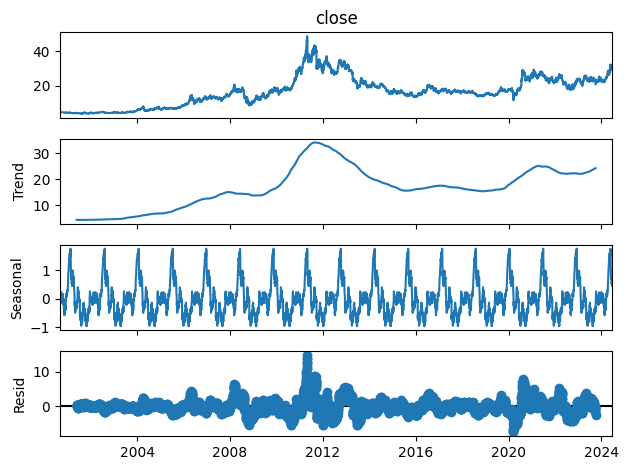

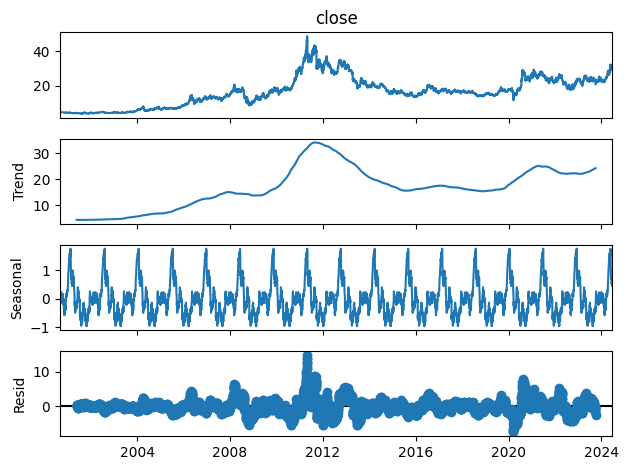

In [280]:
decomp= seasonal_decompose(sil_df['close'], model='additive', period=365)
decomp.plot()

Observation : there is also seasonality in silver 

In [281]:
df_pla= df[df['commodity']=='Platinum'].copy()
df_pla['date']= pd.to_datetime(df_pla['date'])
df_pla= df_pla.set_index('date').sort_index()	

In [282]:
decomp_pla= seasonal_decompose(df_pla['close'], model= ' additive', period=365)

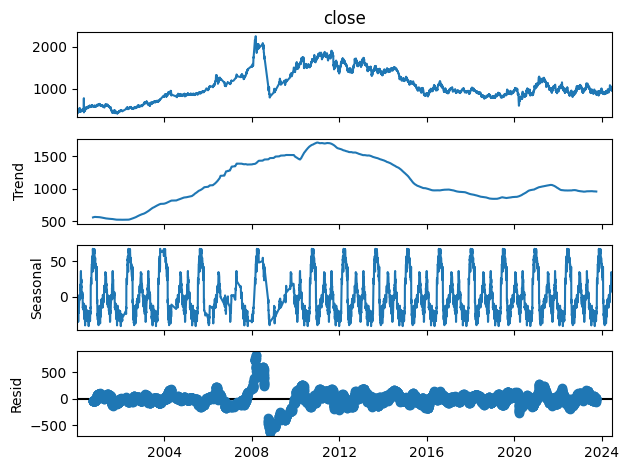

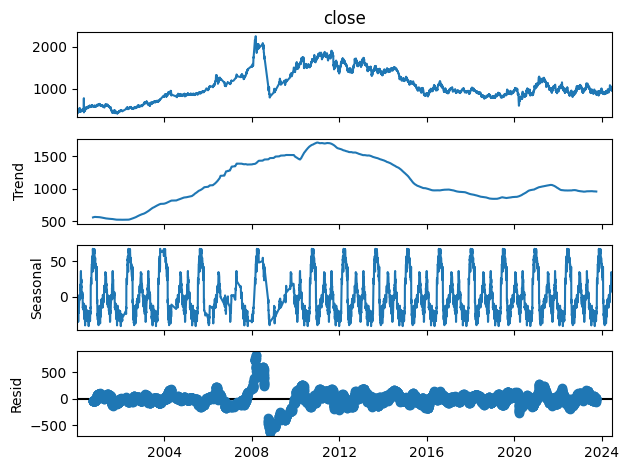

In [283]:
decomp_pla.plot()

Observation : Platinum exhibits a clear seasonal pattern over time; however, there is a notable structural break around 2008. This suggests that while seasonality is present, external economic or market specific events also significantly influenced prices during this period.

Text(0.5, 1.0, 'Platinum Price with Structural Break Marked')

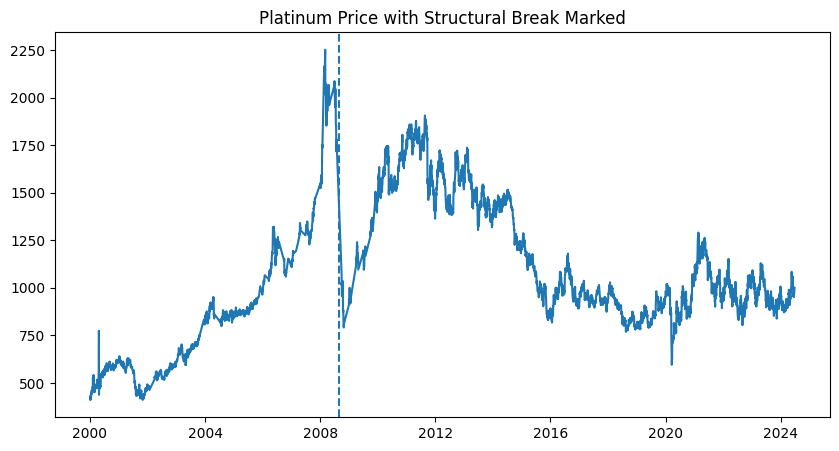

In [284]:
plt.figure(figsize=(10,5))
plt.plot(df_pla['close'])
plt.axvline(pd.to_datetime('2008-09-01'), linestyle='--')
plt.title("Platinum Price with Structural Break Marked")


In [285]:
monthly = (df[ (df['year']==2008) & (df['commodity']=='Platinum')].groupby('month')['close'].mean())

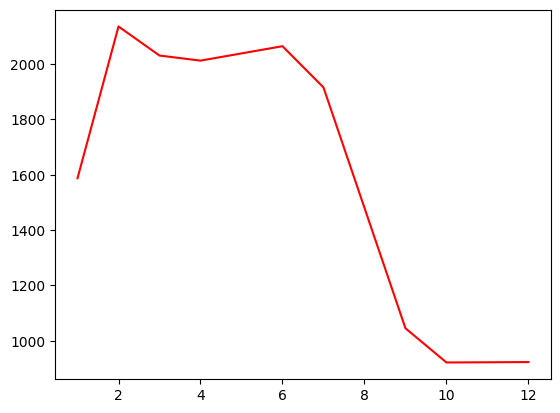

In [286]:
plt.plot(monthly.index, monthly.values, color='red')

#### Feature Engineering

In [287]:
df.head()

,ticker,commodity,date,open,high,low,close,volume,year,month,day
11951,PL=F,Platinum,2000-01-04,428.0,430.0,421.000000,429.700012,632,2000,1,4
23373,PA=F,Palladium,2000-01-04,445.0,446.0,439.000000,441.899994,177,2000,1,4
23374,PA=F,Palladium,2000-01-05,436.0,439.0,433.000000,438.100006,319,2000,1,5
11952,PL=F,Platinum,2000-01-05,428.0,428.0,416.899994,419.899994,571,2000,1,5
23375,PA=F,Palladium,2000-01-06,434.5,437.0,430.200012,435.299988,180,2000,1,6


In [288]:
df['ticker'].unique()

array(['PL=F', 'PA=F', 'GC=F', 'SI=F', 'HG=F'], dtype=object)

In [289]:
df['commodity'].unique()

array(['Platinum', 'Palladium', 'Gold', 'Silver', 'Copper'], dtype=object)

In [290]:
df.drop(columns=['ticker'], inplace=True)

In [291]:
df.drop(columns=['date'], inplace=True)

In [292]:
df = pd.get_dummies(df, columns=['commodity'], drop_first=True, dtype=int)
df.head()

,open,high,low,close,volume,year,month,day,commodity_Gold,commodity_Palladium,commodity_Platinum,commodity_Silver
11951,428.0,430.0,421.000000,429.700012,632,2000,1,4,0,0,1,0
23373,445.0,446.0,439.000000,441.899994,177,2000,1,4,0,1,0,0
23374,436.0,439.0,433.000000,438.100006,319,2000,1,5,0,1,0,0
11952,428.0,428.0,416.899994,419.899994,571,2000,1,5,0,0,1,0
23375,434.5,437.0,430.200012,435.299988,180,2000,1,6,0,1,0,0


In [293]:
X = df.drop(columns=['close'])  
y = df['close']                  


In [294]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29056 entries, 11951 to 29055
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   open                 29056 non-null  float64
 1   high                 29056 non-null  float64
 2   low                  29056 non-null  float64
 3   close                29056 non-null  float64
 4   volume               29056 non-null  int64  
 5   year                 29056 non-null  int32  
 6   month                29056 non-null  int32  
 7   day                  29056 non-null  int32  
 8   commodity_Gold       29056 non-null  int64  
 9   commodity_Palladium  29056 non-null  int64  
 10  commodity_Platinum   29056 non-null  int64  
 11  commodity_Silver     29056 non-null  int64  
dtypes: float64(4), int32(3), int64(5)
memory usage: 2.5 MB


In [296]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [297]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R²:", r2_score(y_test, y_pred))
print("RMSE:", rmse)


R²: 0.9999502656047043
RMSE: 4.56147252807544


In [298]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [299]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [300]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R²: 0.9999502656047043
RMSE: 4.56147252807544


In [302]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R²: 0.9999366067164023
RMSE: 5.149893720487884


Seems overfitting need to check some things 